# Tutorial: SP1 bindings in Cre-driver mouse lines. 

 This is a transcription factor SP1 binding bulk calling cards data in cre-driver mouseline and bulk brd4 data is also sequenced as backgound. This dataset contains two time points: day 10(P10) and day 28(P28). The dataset is from [Cammack et al., PNAS. (2020)](https://www.pnas.org/doi/10.1073/pnas.1918241117), and it can be downloaded from [GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE128493).
 
 
 In this tutorial, we will call peaks, make annotation, and do differential peak analysis. There are 271946 insertions in the SP1 P10 qbed file, 1083099 insertions in the SP1 P28 qbed file, and 5573110 insertions in the brd4 qbed file.

In [1]:
import pycallingcards as cc
import numpy as np
import pandas as pd
import scanpy as sc

We start by reading qbed data. In this data, one row is one insertion and the columns indicate the chromosome, start point and end point, reads number, the direction, and barcode of each insertion. For example, the first row means one insertion is on Chromosome 1, and starts from 3095378 and ends on 3095382. The reads number is 7 with direction going from 3' to 5'. The barcode of the cell is TAAGG. We give it the group column to distinguish between groups. 

Use ```cc.rd.read_qbed(filename)``` to read your own qbed data.

In [2]:
SP1_P10 = cc.datasets.SP1_Cre_data(data="SP1_P10")
SP1_P10['group'] = 'P10'
SP1_P10

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3095378,3095382,7,+,TAAGG,P10
1,chr1,3120128,3120132,1,+,GTTAC,P10
2,chr1,3121275,3121279,10,-,GTTAC,P10
3,chr1,3121275,3121279,2,-,GTTAC,P10
4,chr1,3222947,3222951,1,-,GTTAC,P10
...,...,...,...,...,...,...,...
271941,chrY,1010004,1010008,1,-,GTTAC,P10
271942,chrY,1011155,1011159,12,-,GTTAC,P10
271943,chrY,1178766,1178770,10,+,GTTAC,P10
271944,chrY,1244787,1244791,11,+,GTTAC,P10


In [3]:
SP1_P28 = cc.datasets.SP1_Cre_data(data="SP1_P28")
SP1_P28['group'] = 'P28'
SP1_P28

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,ACTGC,P28
2,chr1,3102707,3102711,1,-,GTCAT,P28
3,chr1,3119905,3119909,4,+,GTCAT,P28
4,chr1,3120189,3120193,66,-,GTCAT,P28
...,...,...,...,...,...,...,...
1083094,chrY,90803579,90803583,14,-,GTCAT,P28
1083095,chrY,90805130,90805134,10,+,ACTGC,P28
1083096,chrY,90805130,90805134,1,+,CGAAA,P28
1083097,chrY,90806531,90806535,5,-,GTCAT,P28


In order to call peak, we need to conbine two qbed files together.

In [4]:
SP1 = cc.rd.combine_qbed([SP1_P10,SP1_P28])
SP1

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,TAAGG,P10
2,chr1,3095378,3095382,7,+,ACTGC,P28
3,chr1,3102707,3102711,1,-,GTCAT,P28
4,chr1,3119905,3119909,4,+,GTCAT,P28
...,...,...,...,...,...,...,...
1355040,chrY,90803579,90803583,14,-,GTCAT,P28
1355041,chrY,90805130,90805134,10,+,ACTGC,P28
1355042,chrY,90805130,90805134,1,+,CGAAA,P28
1355043,chrY,90806531,90806535,5,-,GTCAT,P28


The qbed data might contain some extra chromosomes, clean it here.

In [5]:
SP1 = cc.pp.clean_qbed(SP1)
SP1

,Chr,Start,End,Reads,Direction,Barcodes,group
0,chr1,3071865,3071869,76,+,GTCAT,P28
1,chr1,3095378,3095382,7,+,TAAGG,P10
2,chr1,3095378,3095382,7,+,ACTGC,P28
3,chr1,3102707,3102711,1,-,GTCAT,P28
4,chr1,3119905,3119909,4,+,GTCAT,P28
...,...,...,...,...,...,...,...
1355040,chrY,90803579,90803583,14,-,GTCAT,P28
1355041,chrY,90805130,90805134,10,+,ACTGC,P28
1355042,chrY,90805130,90805134,1,+,CGAAA,P28
1355043,chrY,90806531,90806535,5,-,GTCAT,P28


We then read the brd4 background file.

In [6]:
bg = cc.datasets.SP1_Cre_data(data="background")
bg

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,3004272,3004276,5,+,ACTGC
1,chr1,3028063,3028067,6,-,ACTGC
2,chr1,3043241,3043245,1,-,ACTGC
3,chr1,3049117,3049121,1,-,CAGTG
4,chr1,3052152,3052156,1,+,ACTGC
...,...,...,...,...,...,...
5573105,chrY,90811001,90811005,2,+,CAGTG
5573106,chrY,90811001,90811005,1,+,CAGTG
5573107,chrY,90811001,90811005,1,+,CAGTG
5573108,chrY,90811001,90811005,2,+,TGACA


In [7]:
bg = cc.pp.clean_qbed(bg)
bg

,Chr,Start,End,Reads,Direction,Barcodes
0,chr1,3004272,3004276,5,+,ACTGC
1,chr1,3028063,3028067,6,-,ACTGC
2,chr1,3043241,3043245,1,-,ACTGC
3,chr1,3049117,3049121,1,-,CAGTG
4,chr1,3052152,3052156,1,+,ACTGC
...,...,...,...,...,...,...
5573105,chrY,90811001,90811005,2,+,CAGTG
5573106,chrY,90811001,90811005,1,+,CAGTG
5573107,chrY,90811001,90811005,1,+,CAGTG
5573108,chrY,90811001,90811005,2,+,TGACA


Because the insertions are discrete, we now need to call the peaks to diagnose potential binding sites. Three different methods ('CCcaller', 'cc_tools', 'Blockify') are available along with three different species ('hg38', 'mm10', 'sacCer3'). 

In this setting, we use ***cc_tools*** in *mouse*('mm10') data.  *window_size* is the most important parameter for *cc_tools*, and it is highly related to the length of a peak. 1000-3500 is a good fit for *window_size*. *step_size* is another important paramenter and it controls how careful we are looking into the chromosomes. 500-1000 is good for *step_size*. *pvalue_cutoffTTAA* is the pvalue cutoff for TTAA data and  *pvalue_cutoffbg* is pvalue cutoff for the background qbed data. Normally, the setting for *pvalue_cutoffbg* is higher than *pvalue_cutoffTTAA*, but both of them should not exceed 0.1. 

In [8]:
peak_data = cc.pp.call_peaks(SP1, bg,  method = "cc_tools", reference = "mm10", pvalue_cutoffbg = 0.1, window_size=1500, step_size=500,
                  pvalue_cutoffTTAA = 0.001, lam_win_size = None,  pseudocounts = 0.1, record = True, save = "peak.bed")
peak_data

For the cc_tools method with background, [expdata, background, reference, pvalue_cutoffbg, pvalue_cutoffTTAA, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 21/21 [08:54<00:00, 25.47s/it]


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,TPH Experiment,Fraction background,TPH background,TPH background subtracted,pvalue_adj Reference
0,chr1,3399656,3400345,3400068.0,21,69,8,0.000000e+00,4.836733e-02,0.000015,1549.993948,1.238144e-05,1238.144320,311.849628,0.000000e+00
1,chr1,3672013,3673193,3672213.0,61,47,9,0.000000e+00,0.000000e+00,0.000045,4502.363372,8.433737e-06,843.373667,3658.989705,0.000000e+00
2,chr1,4773450,4774236,4773657.0,6,5,4,2.559005e-07,2.134275e-04,0.000004,442.855414,8.972060e-07,89.720603,353.134811,2.452755e-05
3,chr1,4785206,4786669,4786073.0,31,47,13,0.000000e+00,3.342206e-08,0.000023,2288.086304,8.433737e-06,843.373667,1444.712637,0.000000e+00
4,chr1,4856928,4857866,4857364.0,24,70,9,0.000000e+00,1.158218e-02,0.000018,1771.421654,1.256088e-05,1256.088440,515.333214,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,chrY,896958,898127,897848.0,5,3,8,1.399050e-09,2.600377e-04,0.000004,369.046178,5.383236e-07,53.832362,315.213816,1.652588e-07
23810,chrY,1009804,1011442,1010850.0,17,2,16,0.000000e+00,0.000000e+00,0.000013,1254.757005,3.588824e-07,35.888241,1218.868764,0.000000e+00
23811,chrY,1244073,1245447,1244787.0,5,5,13,1.481609e-09,2.742110e-03,0.000004,369.046178,8.972060e-07,89.720603,279.325575,1.749013e-07
23812,chrY,1286004,1286938,1286560.0,6,5,11,2.109901e-11,5.168551e-04,0.000004,442.855414,8.972060e-07,89.720603,353.134811,2.845268e-09


Approach the above by first combining the data and then call peaks together. Although not recommended, you could also try calling peaks seperately and then merging the peaks by [pybedtools](https://daler.github.io/pybedtools/). Below is the code:

```python
import pybedtools
peak_data1 = cc.pp.callpeaks(SP1_P10, bg,  method = "cc_tools", reference = "mm10", pvalue_cutoffbg = 0.1, window_size=1500, 
                                step_size=500, lam_win_size = None,  pseudocounts = 0.1, record = True)
peak_data2 = cc.pp.callpeaks(SP1_P28, bg,  method = "cc_tools", reference = "mm10", pvalue_cutoffbg = 0.1, window_size=1500, 
                                step_size=500, lam_win_size = None,  pseudocounts = 0.1, record = True)
peak = cc.rd.combine_qbed([peak_data1,peak_data2])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe() 
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})

```

In order to choose the suitable method and parameters for peak calling, please take a look at genome areas. We stongly advise to adjust the parameters for ```cc.pp.callpeaks()``` to call better peaks.

In this plot, the colored ones are the experiment qbed data and the gray ones are the background data. The top section shows insertions and their read counts. One dot is an insertion and the height is log(reads+1). The middle section indicates the distribution of insertions. The bottom section represents reference genes and peaks. 


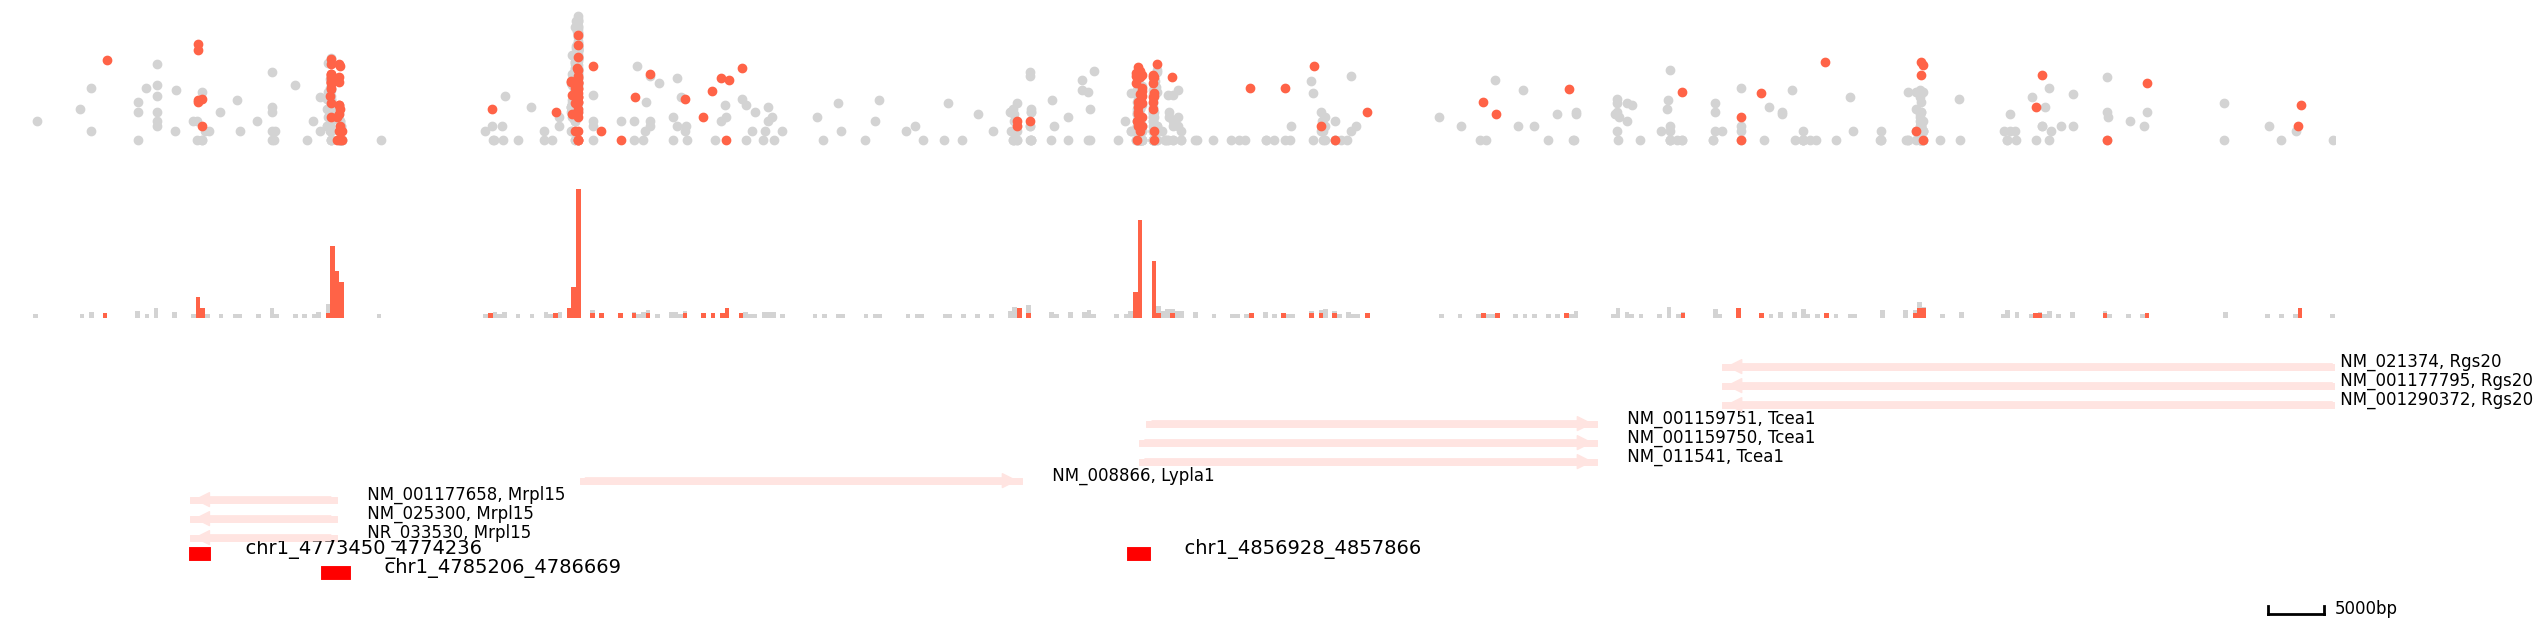

In [9]:
cc.pl.draw_area("chr1",4856929,4863861,100000,peak_data, SP1, "mm10", bg,
                figsize = (30,8),peak_line = 2,save = False, bins = 500, example_length = 5000)

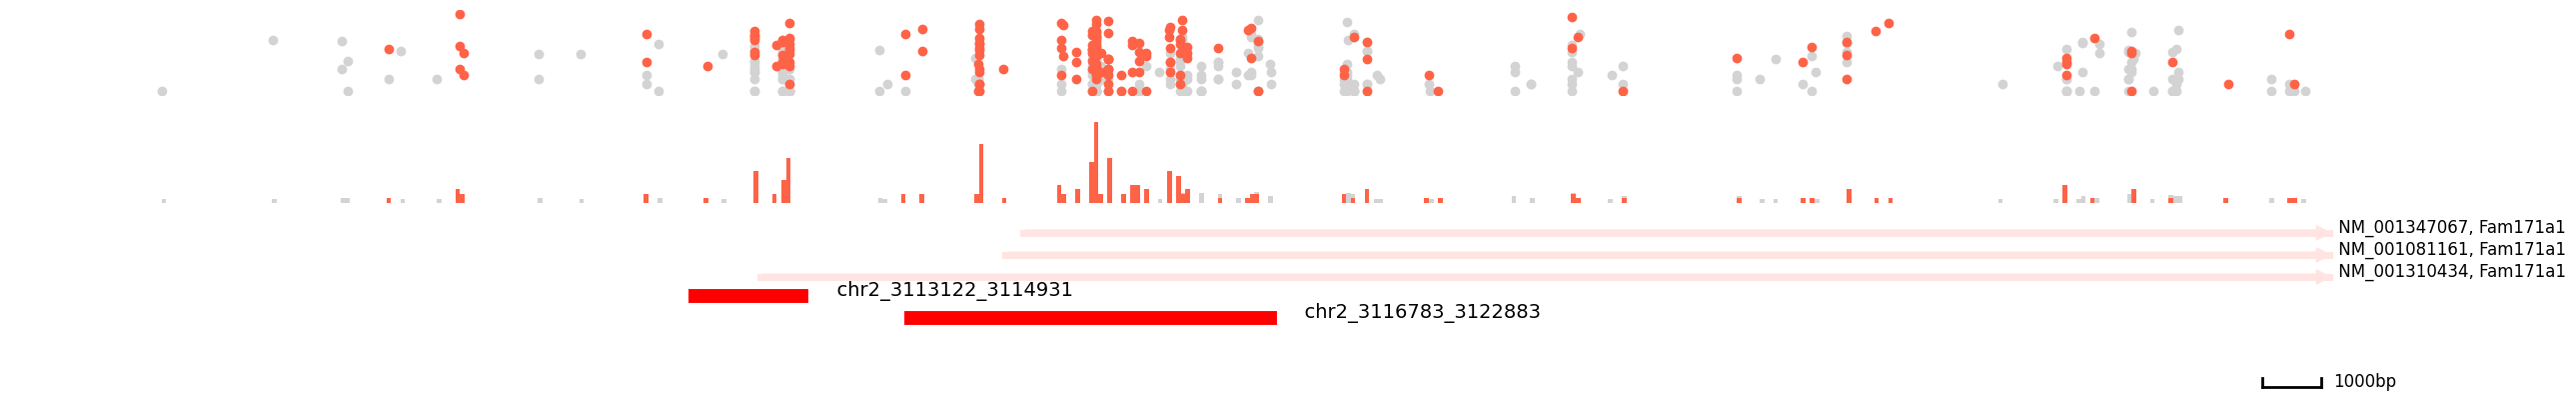

In [10]:
cc.pl.draw_area("chr2",3116481,3125943,15000,peak_data, SP1, "mm10", bg,
                figsize = (30,5),peak_line = 3,save = False, bins = 500, example_length = 1000)

We could also visualize our data in [WashU Epigenome Browser](http://epigenomegateway.wustl.edu/browser/) directly. 
Notice that this link only valid for 24hrs, so please rerun it if you want to use it.

In [11]:
qbed= {"SP1":SP1, "bg":bg}
bed = {'PEAK':peak_data}
cc.pl.WashU_browser_url(qbed,bed,genome = 'mm10')

All qbed addressed
All bed addressed
Uploading files
Please click the following link to see the data on WashU Epigenome Browser directly.
https://epigenomegateway.wustl.edu/browser/?genome=mm10&hub=https://companion.epigenomegateway.org//task/24c579dd03d8f36f0cf712292c8addd4/output//datahub.json


We advise to look at the whole chromosome and see the distribution of peaks to make sure everything is going accordingly.

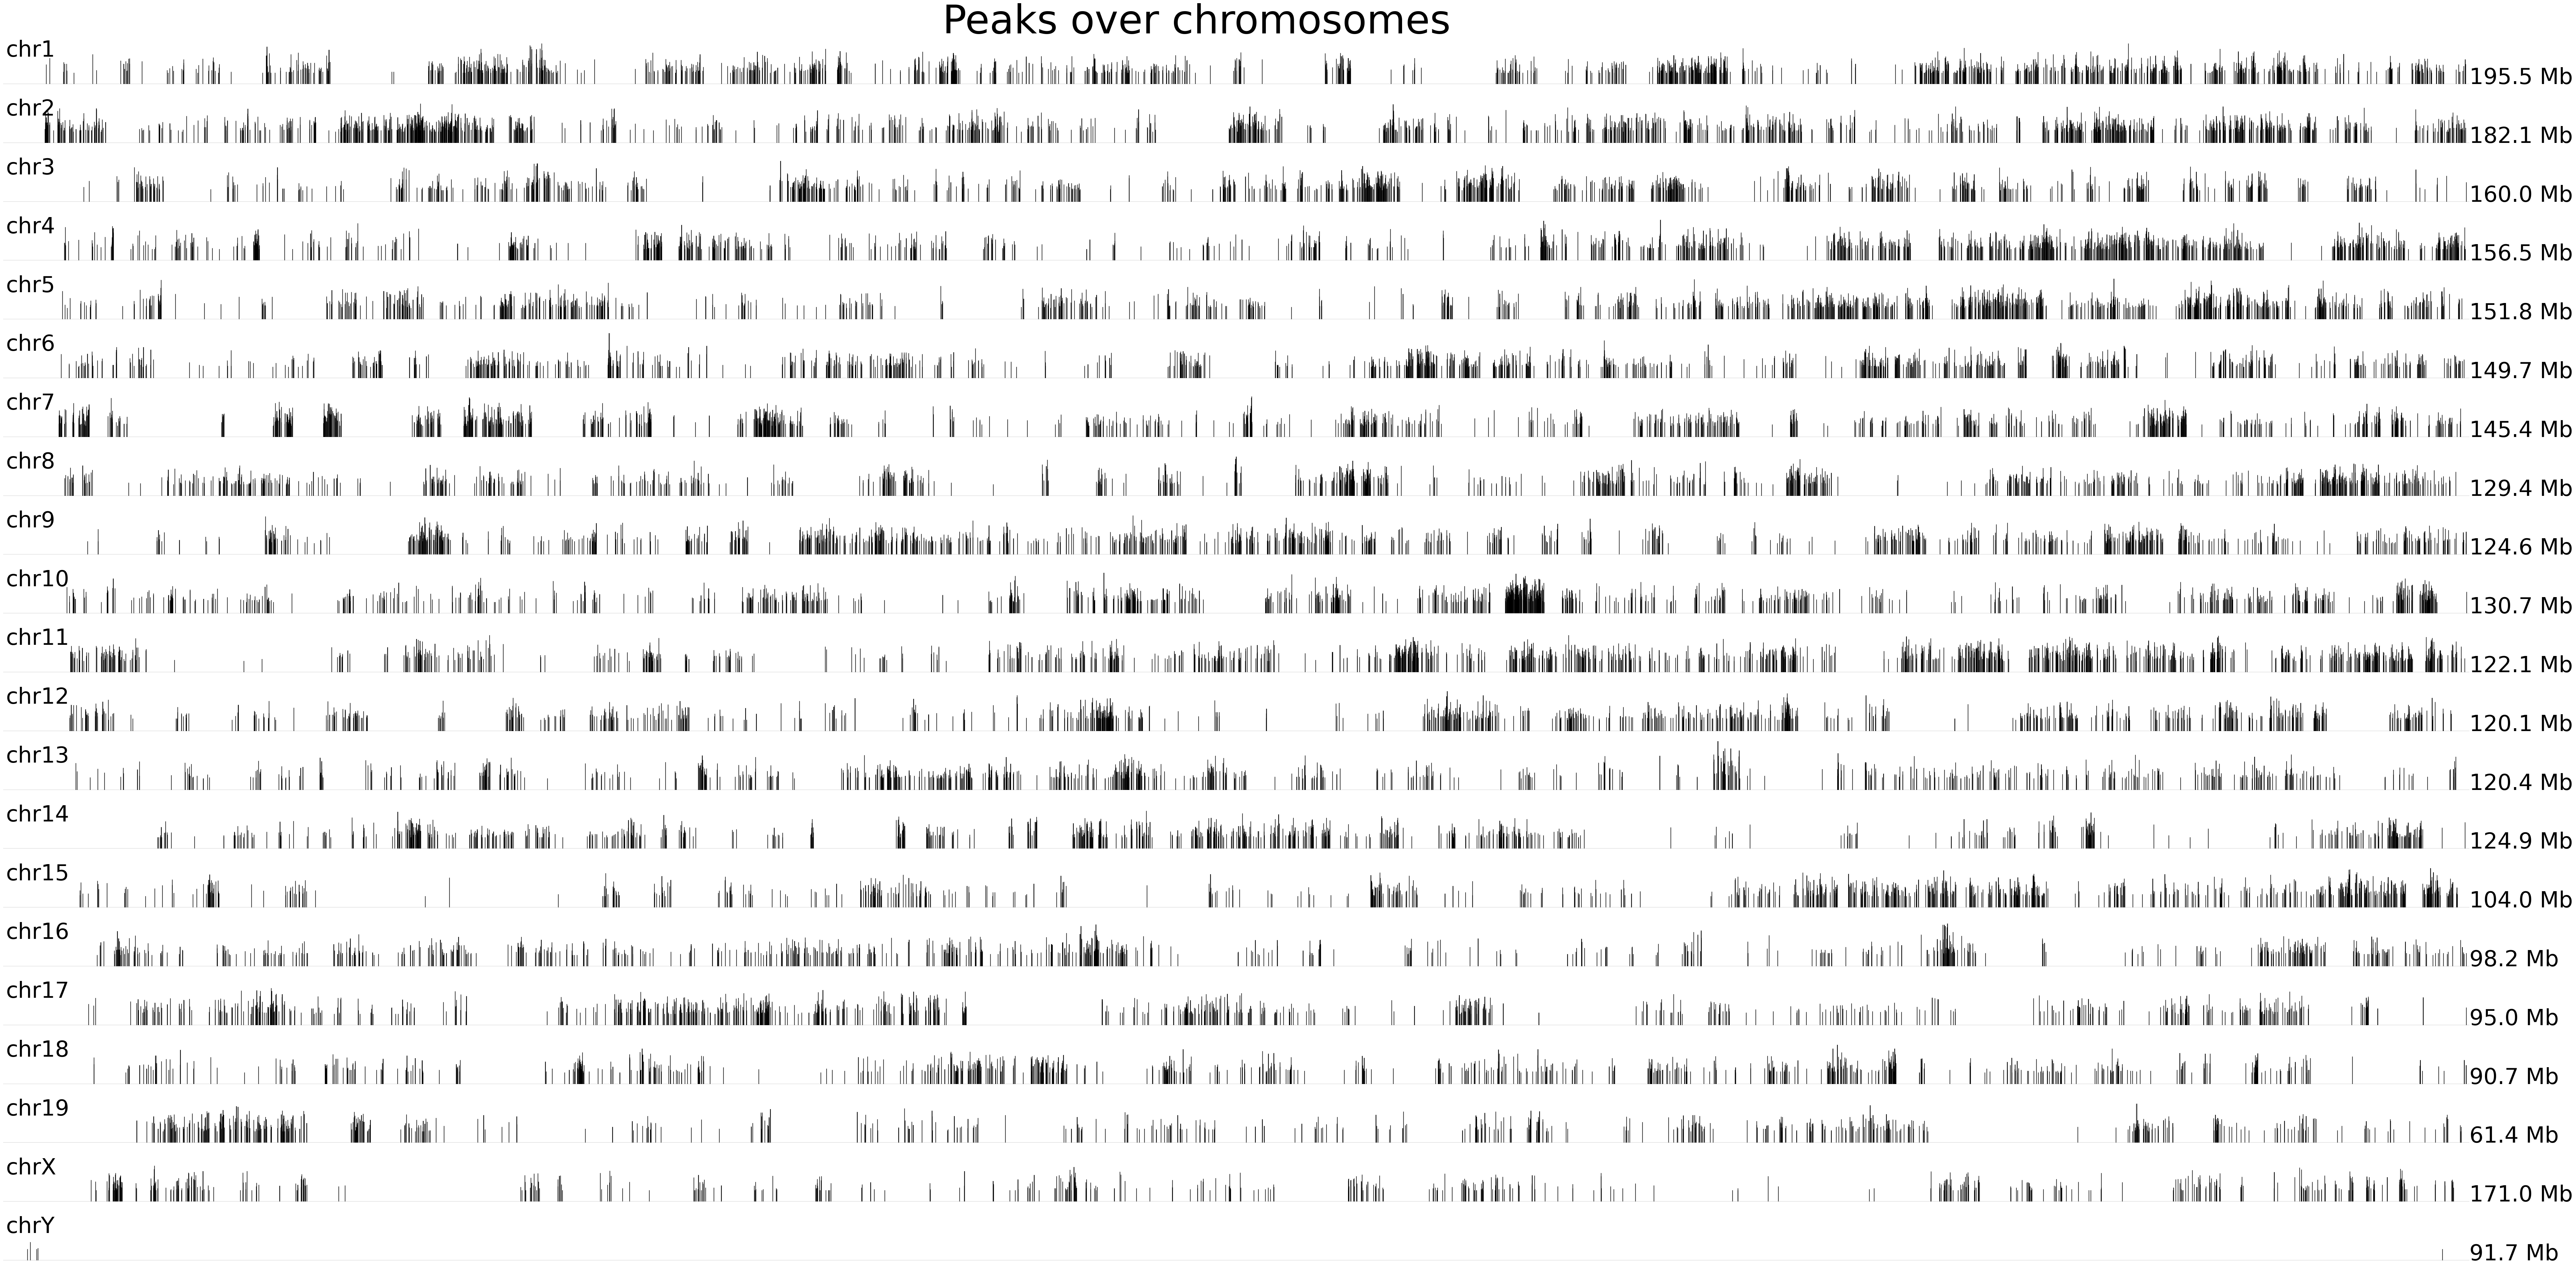

In [12]:
cc.pl.whole_peaks(peak_data,linewidth = 1, reference = "mm10")

Call motif to check the peak results.

In [13]:
cc.tl.call_motif(peaks_frame=peak_data,reference ="mm10",save_homer = "Homer/peak", 
                 homer_path = "/ref/rmlab/software/homer/bin")

There is no save_name, it will save to temp_Homer_trial.bed and then delete.



	Position file = temp_Homer_trial.bed
	Genome = mm10
	Output Directory = Homer/peak
	Fragment size set to 1000
	Using 3 CPUs
	Will not run homer for de novo motifs
	Found mset for "mouse", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 23814
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 23814
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 1000 bp fragments found.

	Extracting sequences from directory: /ref/rmlab/software/homer/.//data/genomes/mm10//
	Extracting 1709 sequences from chr1
	Extracting 1889 sequences from chr2
	Extracting 1332 sequences from chr3
	Extracting 1497 sequences from chr4
	Extracting 1526 sequences from chr5
	Extracting 1295 sequences from chr6
	Extracting 1321 sequences 

Finished!


	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...

rm: cannot remove 'temp_Homer_trial.bed': No such file or directory


In the motif analysis result, SP1 ranks among the top2 result.


<img src="bulk-SP1.png" alt="drawing" width="800"/>

In the next step, we annotate the peaks by their closest genes using [bedtools](https://bedtools.readthedocs.io/en/latest/) and [pybedtools](https://daler.github.io/pybedtools/).
Make sure they are all previously installed before using.

In [14]:
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10")
peak_annotation = cc.pp.combine_annotation(peak_data,peak_annotation)
peak_annotation

In the bedtools method, we would use bedtools in the default path. Set bedtools path by 'bedtools_path' if needed.


,Chr,Start,End,Center,Experiment Insertions,Background insertions,Reference Insertions,pvalue Reference,pvalue Background,Fraction Experiment,TPH Experiment,Fraction background,TPH background,TPH background subtracted,pvalue_adj Reference,Nearest Refseq1,Gene Name1,Nearest Refseq2,Gene Name2
0,chr1,3399656,3400345,3400068.0,21,69,8,0.000000e+00,4.836733e-02,0.000015,1549.993948,1.238144e-05,1238.144320,311.849628,0.000000e+00,NM_001011874,Xkr4,NM_001195662,Rp1
1,chr1,3672013,3673193,3672213.0,61,47,9,0.000000e+00,0.000000e+00,0.000045,4502.363372,8.433737e-06,843.373667,3658.989705,0.000000e+00,NM_001011874,Xkr4,NM_001195662,Rp1
2,chr1,4773450,4774236,4773657.0,6,5,4,2.559005e-07,2.134275e-04,0.000004,442.855414,8.972060e-07,89.720603,353.134811,2.452755e-05,NR_033530,Mrpl15,NM_008866,Lypla1
3,chr1,4785206,4786669,4786073.0,31,47,13,0.000000e+00,3.342206e-08,0.000023,2288.086304,8.433737e-06,843.373667,1444.712637,0.000000e+00,NR_033530,Mrpl15,NM_008866,Lypla1
4,chr1,4856928,4857866,4857364.0,24,70,9,0.000000e+00,1.158218e-02,0.000018,1771.421654,1.256088e-05,1256.088440,515.333214,0.000000e+00,NM_011541,Tcea1,NM_001159751,Tcea1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,chrY,896958,898127,897848.0,5,3,8,1.399050e-09,2.600377e-04,0.000004,369.046178,5.383236e-07,53.832362,315.213816,1.652588e-07,NM_011419,Kdm5d,NM_011667,Uba1y
23810,chrY,1009804,1011442,1010850.0,17,2,16,0.000000e+00,0.000000e+00,0.000013,1254.757005,3.588824e-07,35.888241,1218.868764,0.000000e+00,NM_012011,Eif2s3y,NR_027507,Tspy-ps
23811,chrY,1244073,1245447,1244787.0,5,5,13,1.481609e-09,2.742110e-03,0.000004,369.046178,8.972060e-07,89.720603,279.325575,1.749013e-07,NM_009484,Uty,NM_012008,Ddx3y
23812,chrY,1286004,1286938,1286560.0,6,5,11,2.109901e-11,5.168551e-04,0.000004,442.855414,8.972060e-07,89.720603,353.134811,2.845268e-09,NM_012008,Ddx3y,NM_148943,Usp9y


Use qbed data, peak data and group names to make a group by peak anndata object.

In [15]:
adata_cc = cc.pp.make_Anndata(SP1, peak_annotation, ["P10", "P28"], key = 'group')
adata_cc

100%|██████████| 21/21 [00:07<00:00,  2.78it/s]


AnnData object with n_obs × n_vars = 2 × 23814
    var: 'Chr', 'Start', 'End', 'Center', 'Experiment Insertions', 'Background insertions', 'Reference Insertions', 'pvalue Reference', 'pvalue Background', 'Fraction Experiment', 'TPH Experiment', 'Fraction background', 'TPH background', 'TPH background subtracted', 'pvalue_adj Reference', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2'

Filter peaks by minimum count.

In [16]:
cc.pp.filter_peaks(adata_cc, min_counts=5)
adata_cc

AnnData object with n_obs × n_vars = 2 × 23814
    var: 'Chr', 'Start', 'End', 'Center', 'Experiment Insertions', 'Background insertions', 'Reference Insertions', 'pvalue Reference', 'pvalue Background', 'Fraction Experiment', 'TPH Experiment', 'Fraction background', 'TPH background', 'TPH background subtracted', 'pvalue_adj Reference', 'Nearest Refseq1', 'Gene Name1', 'Nearest Refseq2', 'Gene Name2', 'n_counts'

Differential peak analysis will find out the significant binding for each group. In this example, we use the *Fisher's exact test* to find out.

In [17]:
cc.tl.rank_peak_groups(adata_cc,"Index",method = 'fisher_exact',key_added = 'fisher_exact')

100%|██████████| 2/2 [01:53<00:00, 56.79s/it]


Plot the differential peak analysis results.

Currently, the peaks are ranked by pvalues. It could also be ranked by logfoldchanges by the following codes:

```python
cc.tl.rank_peak_groups(adata_cc,"Index",method = 'fisher_exact',key_added = 'fisher_exact',rankby = 'logfoldchanges')
cc.pl.rank_peak_groups(adata_cc, key = 'fisher_exact',rankby = 'logfoldchanges')

```


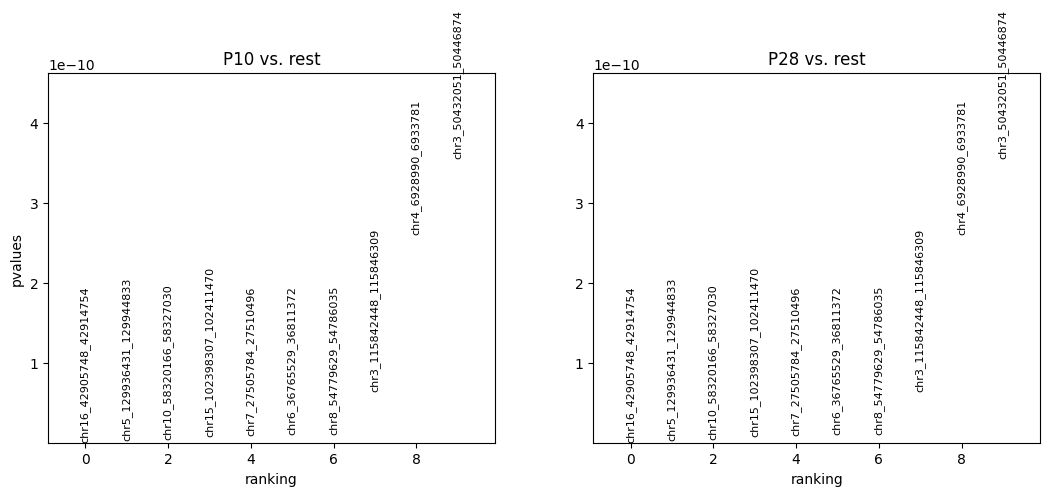

In [18]:
cc.pl.rank_peak_groups(adata_cc, key = 'fisher_exact')

Then, we take a look at the genome for highly differentiated peaks. The colored ones are the insertions for specific cluster and the grey ones are the total insertions information. If we input the backgound file, the grey ones would be the backgound insertions.

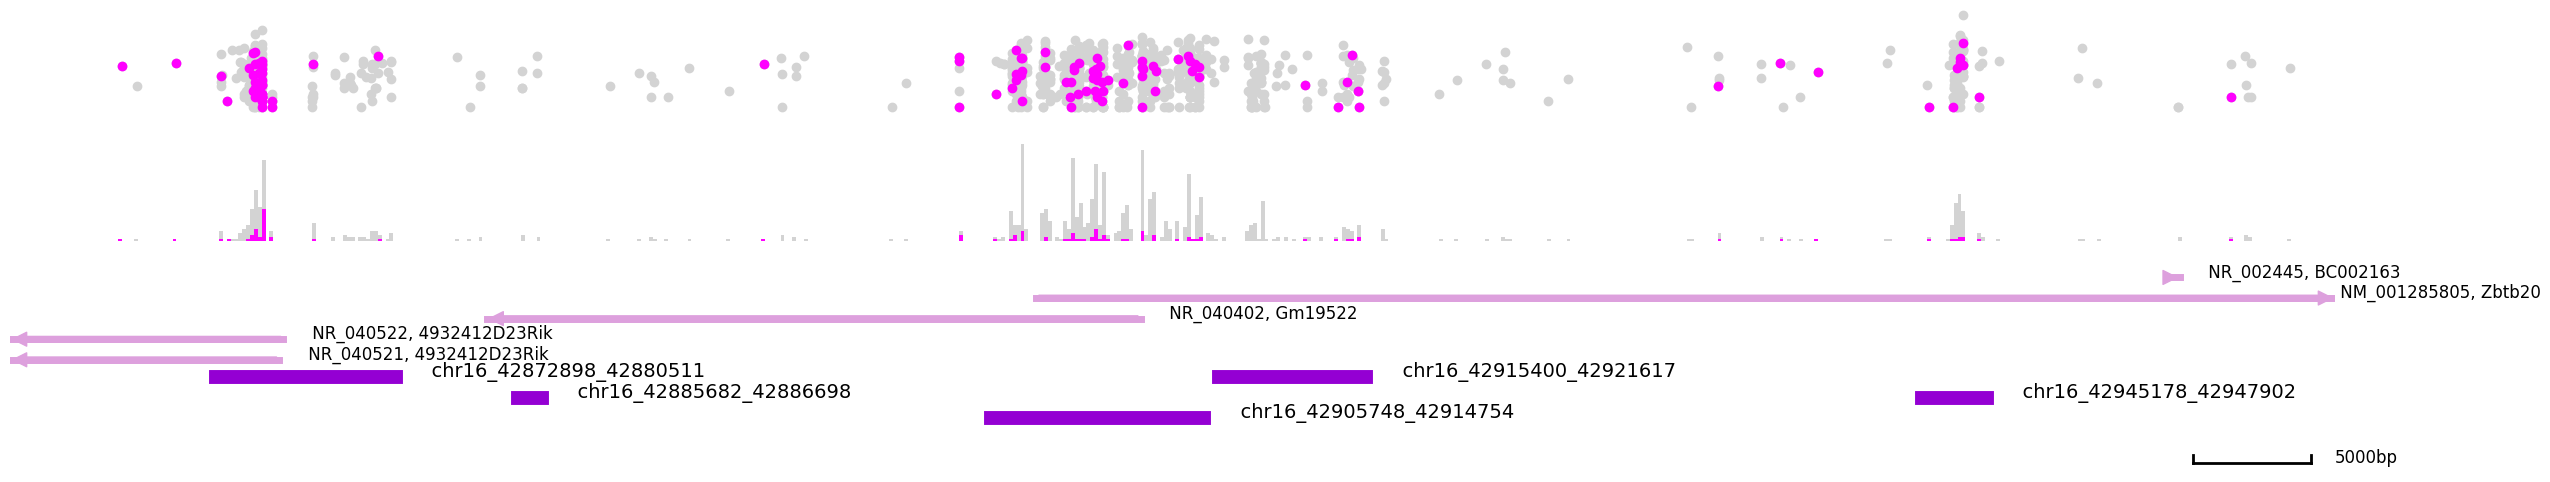

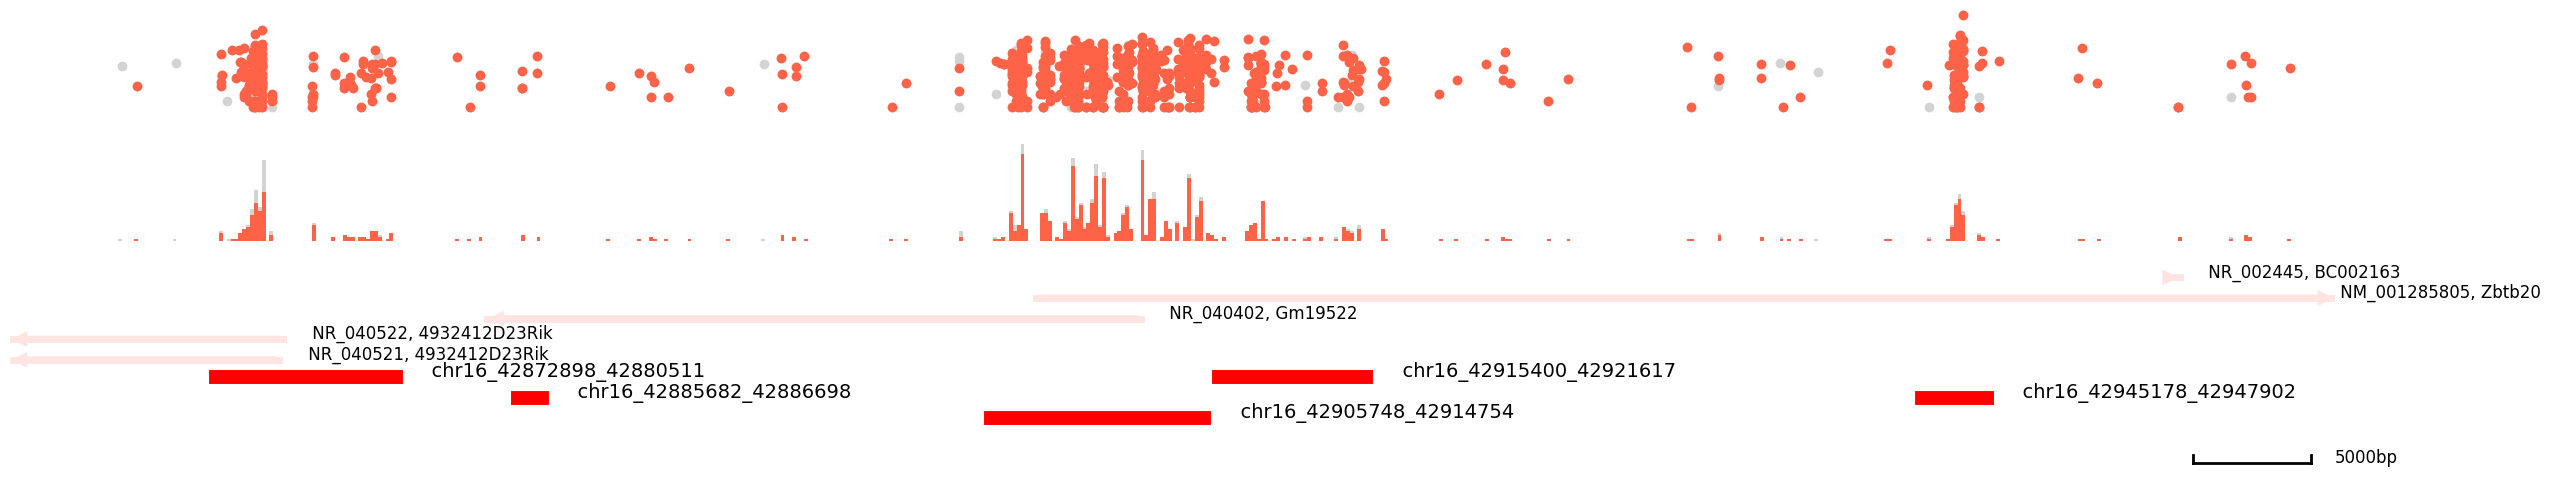

In [19]:
cc.pl.draw_area("chr16",42904181,42922657,40000, peak_data, SP1,"mm10",adata = adata_cc, 
                name = "P10",key = "Index",insertionkey = "group", figsize = (30,6),peak_line = 3, bins = 600, example_length=5000,color = "purple")
cc.pl.draw_area("chr16",42904181,42922657,40000, peak_data, SP1,"mm10",adata = adata_cc, 
                name = "P28",key = "Index", insertionkey = "group", figsize = (30,6),peak_line = 3,bins = 600,example_length=5000)

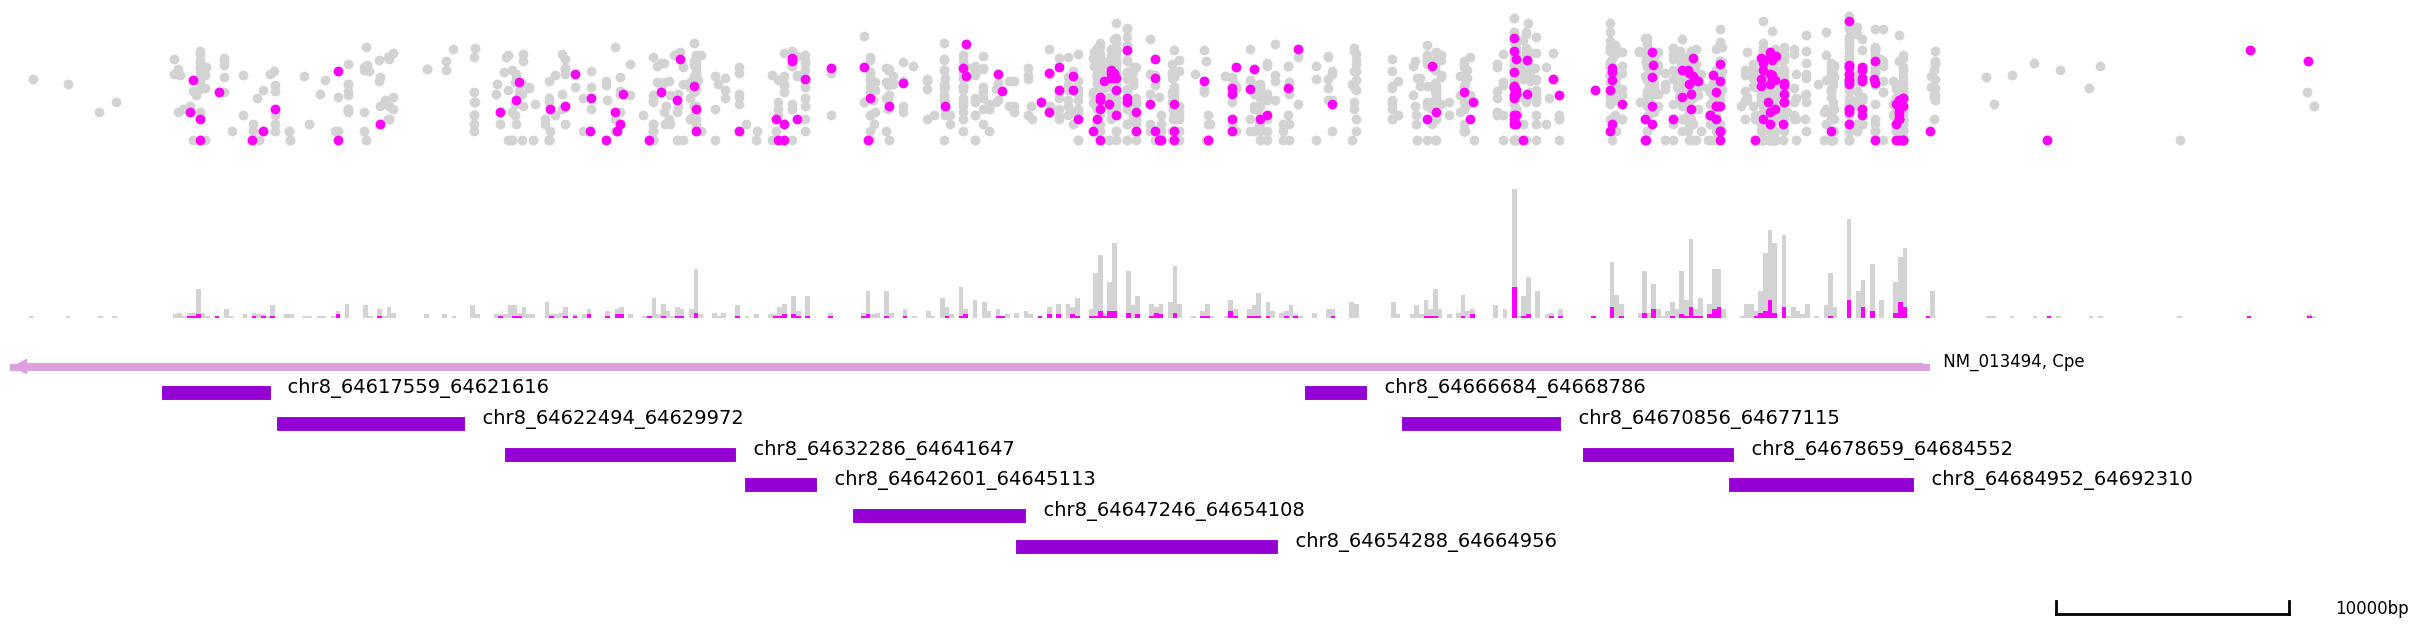

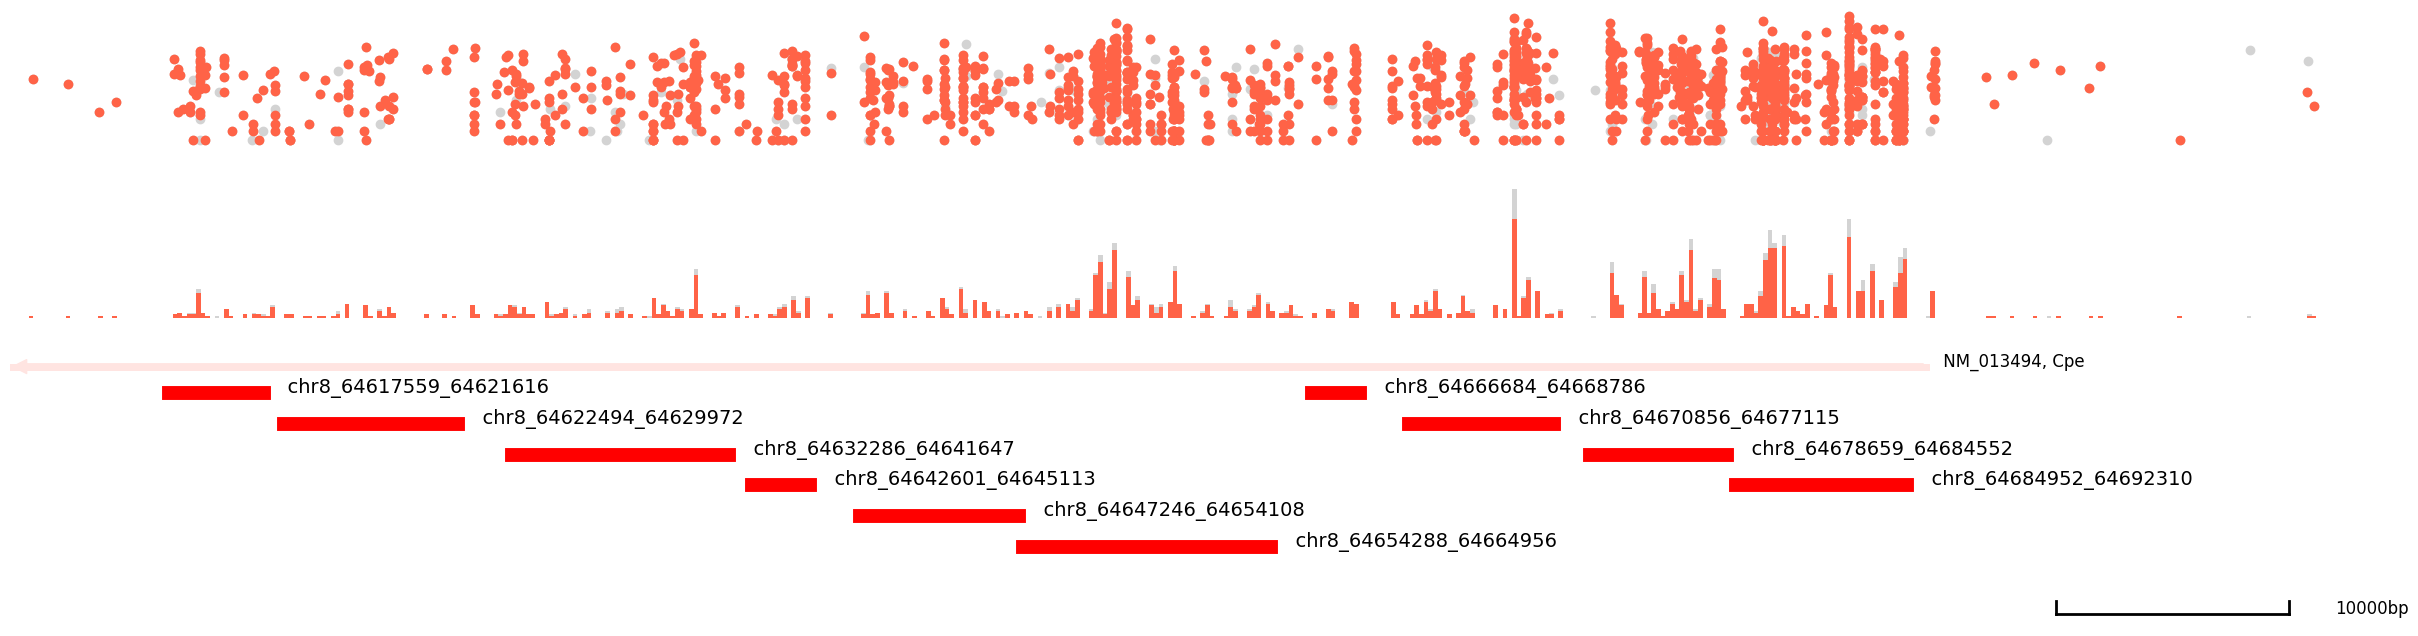

In [20]:
cc.pl.draw_area("chr8",64630703,64690703,20000, peak_data, SP1,"mm10",adata = adata_cc, 
                name = "P10",key = "Index",insertionkey = "group", figsize = (30,8), bins = 500, peak_line = 6,color = "purple")
cc.pl.draw_area("chr8",64630703,64690703,20000, peak_data, SP1,"mm10",adata = adata_cc, 
                name = "P28",key = "Index", insertionkey = "group", figsize = (30,8), bins = 500, peak_line = 6)

Plot the volcano plot for differential binding sites.

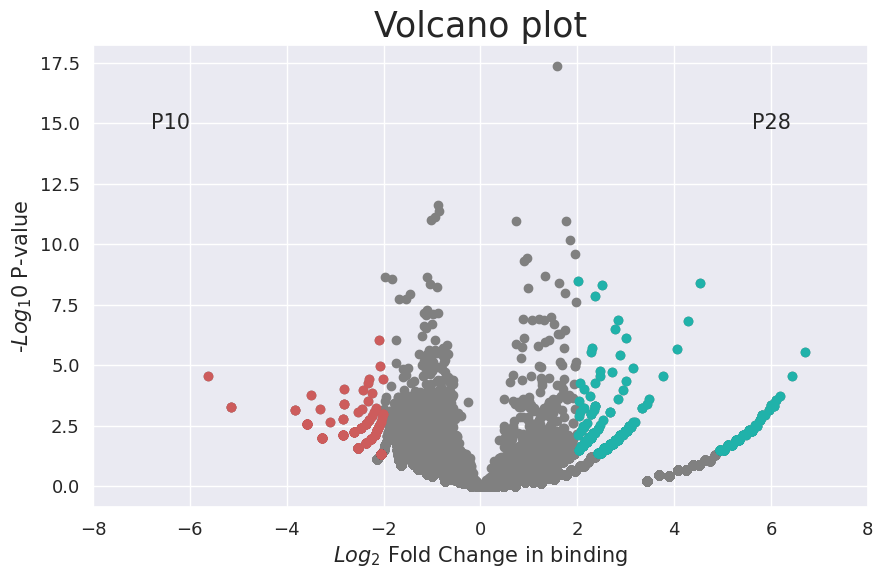

In [21]:
cc.pl.volcano_plot(adata_cc, pvalue_cutoff = 0.05, lfc_cutoff = 2)

This is the heatmap for relative calling cards bindings.

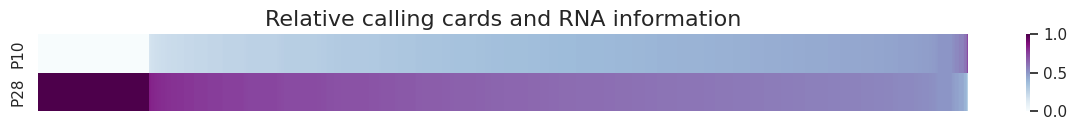

In [22]:
cc.pl.heatmap(adata_cc, figsize=(15,1))

We can see from this plot that P28 has a lot of unique bindings and it has much more insertions for most of the peaks. This is consistent with the experiemnt as P28 is the accumulated insertions from day1 to day 28 while P10 reflect the insertions until day 10. 

Save the file if needed.

In [23]:
adata_cc.write("SP1_qbed.h5ad")